# Probabilidade e Estatística

## Curso Superior de Tecnologia em Ciência de Dados

### Prof. Dr. Neylson Crepalde

Conteúdo abordado: distribuições amostrais

Principal fonte: STEVENSON, Wiliam J.; DE FARIAS, Alfredo Alves. **Estatística aplicada à administração.** São Paulo: Harper e Row do Brasil, 1981.

---

# Distribuições amostrais

**A finalidade** da amostragem é obter uma indicação do valor de um ou mais parâmetros de uma população, tais como a média, o desvio padrão populacional, ou a proporção de itens que possuem determinada característica. As estatísticas amostrais que correspondem a esses parâmetros populacionais são usadas para aproximar os valores desconhecidos daqueles parâmetros. Assim é que a média amostral é usada para estimar a média da população, o desvio padrão amostral é usado para estimar o desvio padrão populacional, e a proporção amostral serve para estimar a proporção da população.

Uma das realidades da amostragem aleatória é que, quando se extraem repetidas amostras da mesma população, há uma tendência de a estatística amostral variar de uma amostra para outra, e também em relação ao verdadeiro valor do parâmetro, simplesmente em razão de fatores causais relacionados à amostragem (*variabilidade amostral*). 

De modo geral, pode parecer difícil lidar, de maneira racional, com a variabilidade amostral. No caso da amostragem *aleatória*, entretanto, demonstra-se matematicamente que a variabilidade pode ser descrita por distribuições de probabilidades tais como a normal e a binomial. **Quando as distribuições de probabilidade são usadas desta maneira, são conhecidas como distribuições amostrais**. 

A questão a responder para cada amostra é: *Quão próxima está a estatística amostral do verdadeiro valor do parâmetro populacional?* A resposta depende de três fatores:

1. A estatística a ser considerada;
2. O tamanho da amostra;
3. A variabilidade existente na própria população.

> Uma *distribuição amostral* é uma distribuição de probabilidades que indica até que ponto uma estatística amostral tende a variar devido a variações causais na amostragem aleatória.

#### Exemplo

Suponhamos que um fazendeiro deseja vender alguns porcos. Para simplicidade, limitemos a população a 5 porcos. Os respectivos pesos dos porcos são conforme a tabela abaixo:

| Porco | Peso (lb) |
|-------|-----------|
| A     | 200       |
| B     | 203       |
| C     | 206       |
| D     | 209       |
| E     | 212       |
|       | 1030      |

Suponhamos que qualquer porco que pese menos que 205 lbs seja considerado magro e não pode ser vendido a preço razoável. A proporção de porcos magros é, portanto, $\frac{2}{5}$ da população. Suponhamos que o fazendeiro quisesse estimar a proporção de seus porcos que estão abaixo do peso a partir de uma amostra de porcos. Que proporções amostrais são possíveis e quão viável é cada uma? Queremos a *distribuição amostral* da situação.

A tabela abaixo ilustra todas as amostras possíveis da população de porcos do fazendeiro.

| Tamanho da amostra | Número de amostras possíveis | Combinação de amostras | Pesos amostrais | Proporção de magros |
|--------------------|------------------------------|------------------------|-----------------|---------------------|
| 2 | 10 | A, B | 200, 203 | 2/2 |
|  |  | A, C | 200, 206 | 1/2 |
|  |  | A, D | 200, 209 | 1/2 |
|  |  | A, E | 200, 212 | 1/2 |
|  |  | B, C | 203, 206 | 1/2 |
|  |  | B, D | 203, 206 | 1/2 |
|  |  | B, E | 203, 212 | 1/2 |
|  |  | C, D | 206, 209 | 0/2 |
|  |  | C, E | 206, 212 | 0/2 |
|  |  | D, E | 209, 212 | 0/2 |

A distribuição amostral mostra que as propoções amostrais possíveis são 0/2, 1/2 e 2/2. Mostra também *quão provável* é cada proporção, sob a hipótese de que cada porco tenha a mesma chance de ser incluído na amostra (isto é, amostragem *aleatória*). Por exemplo, há uma probabilidade de 0,6 de a proporção amostral ser 1/2, o que está próximo da proporçao real (como são usadas amostras de 2, seria impossível termos uma proporção *amostral* de 2/5).

In [163]:
using Plots, LaTeXStrings, Distributions, StatsBase, StatsPlots, Random

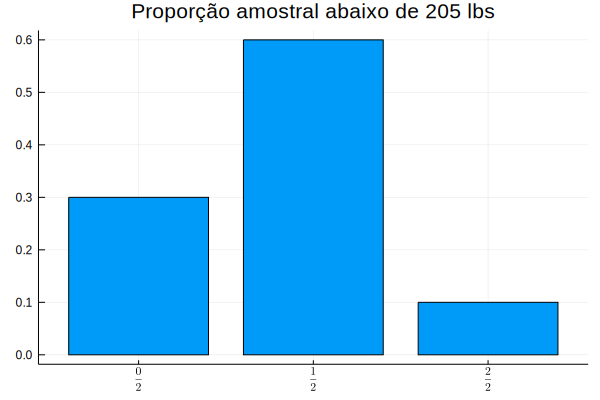

In [2]:
bar(1:3, [0.3, 0.6, 0.1], legend=false, title="Proporção amostral abaixo de 205 lbs")
xticks!(1:3, [L"\frac{0}{2}", L"\frac{1}{2}", L"\frac{2}{2}"])

# Efeito do tamanho da amostra sobre uma distribuição amostral

Pode ser demonstrado que à medida que aumenta o tamanho da amostra, (1) a distribuição amostral das proporções tende para a normalidade e (2) a variabilidade amostral decresce.

Vamos replicar o exemplo dos porcos agora com uma população simulada de 1000 porcos.

In [10]:
pesos = trunc.(Int, rand(Uniform(200, 212), 1000))

1000-element Array{Int64,1}:
 204
 210
 204
 204
 200
 208
 211
 207
 205
 210
 206
 211
 207
   ⋮
 211
 202
 208
 201
 205
 210
 209
 205
 211
 205
 211
 204

Vamos verificar qual é a real proporção de porcos abaixo do peso na população que geramos:

In [25]:
function get_prop_magros(x)
    binaria = ifelse.(x .< 205, 1, 0)
    return sum(binaria) / length(binaria)
end

get_prop_magros (generic function with 1 method)

In [26]:
get_prop_magros(pesos)

0.39

39%. Agora vamos verificar 1000 amostras com diferentes tamanhos para ver como a distribuição amostral se comporta:

In [96]:
function generate_samples()
    amostras = Dict{Int, Any}()
    for i in [10, 20, 50, 100, 200]
        s = [sample(pesos, i, replace=false) for j in 1:1000]
        amostras[i] = get_prop_magros.(s)
    end
    return amostras
end

generate_samples (generic function with 2 methods)

In [97]:
provas = generate_samples()

Dict{Int64,Any} with 5 entries:
  200 => [0.335, 0.32, 0.42, 0.37, 0.445, 0.35, 0.385, 0.37, 0.395, 0.385  …  0…
  100 => [0.36, 0.45, 0.47, 0.4, 0.4, 0.39, 0.38, 0.36, 0.35, 0.39  …  0.39, 0.…
  10  => [0.4, 0.3, 0.4, 0.3, 0.7, 0.6, 0.6, 0.5, 0.3, 0.2  …  0.5, 0.4, 0.5, 0…
  50  => [0.4, 0.54, 0.44, 0.38, 0.28, 0.22, 0.36, 0.36, 0.32, 0.42  …  0.46, 0…
  20  => [0.35, 0.3, 0.5, 0.55, 0.25, 0.4, 0.3, 0.45, 0.25, 0.6  …  0.25, 0.65,…

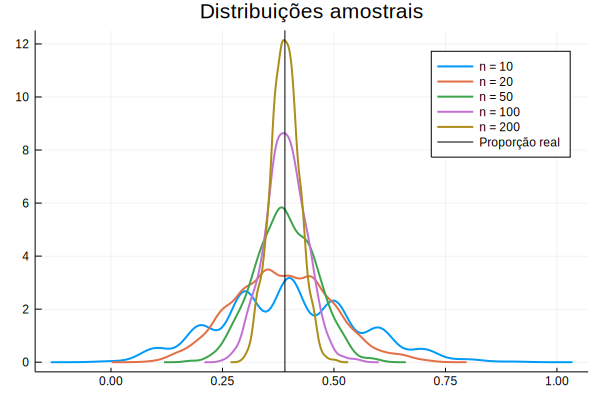

In [115]:
for i in [10, 20, 50, 100, 200]
    if i == 10
        density(provas[i], label=string("n = ", i), width=2)
    else
        density!(provas[i], label=string("n = ", i), width=2)
    end
end
title!("Distribuições amostrais")
vline!([0.39], label="Proporção real", color=:black, width=1)

# Distribuições de médias amostrais

A distribuição amostral das médias amostrais sofre o mesmo efeito observado nas proporções identificadas acima. 

#### Exemplo

Uma turma da faculdade possui 5000 alunos. Vamos simular as idades desses alunos usando uma distribuição normal.

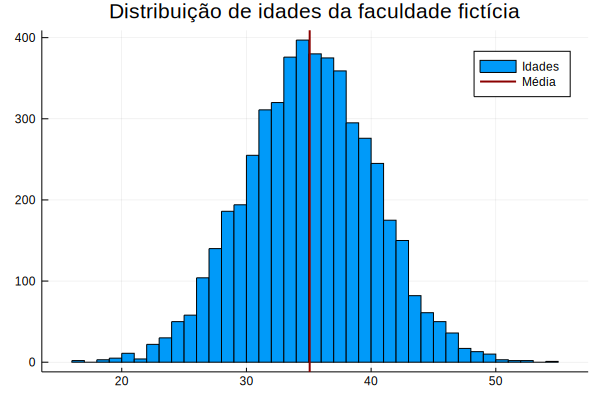

In [215]:
idades = rand(Normal(35, 5), 5000)
histogram(idades, legend=true, title="Distribuição de idades da faculdade fictícia", label="Idades")
vline!([mean(idades)], label="Média", width=2, color=:darkred)

In [216]:
print("Média real: ")
mean(idades)

Média real: 

35.073259069783944

Agora vamos observar como a distribuição amostral das médias de idade amostrais se comportam.

In [221]:
tamanhos_amostra = [50, 100, 200, 500]

4-element Array{Int64,1}:
  50
 100
 200
 500

In [225]:
function generate_mean_distributions(vetor, tamanhos)
    medias = Dict{Int, Any}()
    for i in tamanhos
        s = [sample(vetor, i, replace=false) for j in 1:i*i]
        medias[i] = mean(s)
    end
    return medias
end

generate_mean_distributions (generic function with 3 methods)

In [ ]:
Random.seed!(123)
@time medias = generate_mean_distributions(idades, tamanhos_amostra)

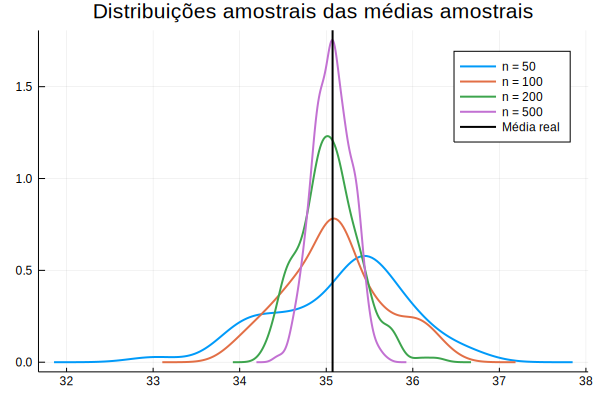

In [224]:
for i in tamanhos_amostra
    if i == minimum(tamanhos_amostra)
        density(medias[i], label=string("n = ", i), width=2)
    else
        density!(medias[i], label=string("n = ", i), width=2)
    end
end
title!("Distribuições amostrais das médias amostrais")
vline!([mean(idades)], label="Média real", color=:black, width=2)

In [153]:
for i in tamanhos_amostra
    print("Desvio padrão na amostra de tamanho " * string(i) * " :")
    println(std(medias[i]))
end

Desvio padrão na amostra de tamanho 10 :0.07954741413362501
Desvio padrão na amostra de tamanho 50 :0.0693830130292654
Desvio padrão na amostra de tamanho 100 :0.07477526665506368
Desvio padrão na amostra de tamanho 200 :0.07236128839995735


In [198]:
for i in tamanhos_amostra
    print("Variância da amostra de tamanho " * string(i) * " :")
    println(var(medias[i]))
end

Variância da amostra de tamanho 100 :0.26589251815695425
Variância da amostra de tamanho 200 :0.10453649703859243
Variância da amostra de tamanho 300 :0.09348704533730044
Variância da amostra de tamanho 500 :0.04815702781060133
